In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:/Users/yerra sriram/Downloads/sales oasis.csv")

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 5)

In [5]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [14]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [15]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [99]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

In [100]:
print(x_train.shape,y_train.shape)

(134, 1) (134,)


In [44]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [45]:
knn=KNeighborsRegressor().fit(x_train,y_train)
knn

KNeighborsRegressor()

In [46]:
knn_train_pred=knn.predict(x_train)

In [47]:
knn_test_pred=knn.predict(x_test)

In [87]:
print(knn_train_pred,knn_test_pred)

[15.94 13.2  19.14 12.08 15.04  6.42 18.72  8.72 18.44 15.12 16.32 14.2
 16.8  11.44 18.32 11.1  12.74 10.36 14.74 17.54 16.94 17.54 14.74  7.52
 16.8  16.98 10.46 15.1  16.3   7.52  7.52 18.14  7.52 17.2  15.78 15.1
 14.46 14.8   8.26  9.34 12.08 19.74 16.32 19.48 19.48  4.48  9.34 15.68
 12.7  17.9  10.2  21.6  16.32 10.82 10.2  16.94 15.92 11.44  7.52 16.52
 12.72 14.56 19.42 17.3   9.42 11.1  17.4  17.1  16.32  5.6  20.3  17.2
  9.14 13.2  15.28 14.94 17.3  16.78 12.92  4.48 15.68  8.26 12.08 14.22
 10.2  13.1  12.08 19.48  9.98 18.32 18.72 10.36  7.3  15.94 10.18 10.2
 15.34 19.74 14.98  5.6  13.76  6.42  8.72 21.6  12.08  8.26 20.54  8.26
 15.78 21.6  14.2  18.14 11.44 21.72  6.42 10.82 10.36 14.22 11.1  17.3
 15.94 19.74 12.72 10.82 18.4  15.94 16.4  17.9   9.98 19.74 17.54 18.72
 10.82 13.64] [12.08 12.08 21.6  15.94 16.34 15.12 10.36 14.98  5.6   8.26 14.98  7.52
 16.78 17.6  17.9  15.04 13.78 11.82 17.6  17.2   6.42 15.78 21.6  12.54
 15.94 12.72  9.42 18.4  18.32 13.2  15.94

In [48]:
Results = pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Variance"])

In [49]:
r2=r2_score(y_test,knn_test_pred)
r2_train=r2_score(y_train,knn_train_pred)
rmse=np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance=r2_train - r2
Results=Results.append({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.6291814994531917
RMSE: 3.4256837406434784


In [50]:
Results.head()


,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.643232,0.629181,3.425684,0.01405


In [51]:
svr=SVR().fit(x_train,y_train)
svr

SVR()

In [52]:
svr_train_pred=svr.predict(x_train)
svr_test_pred=svr.predict(x_test)

In [93]:
print(svr_train_pred,svr_test_pred)

[17.8911439  11.89966892 17.00195296 10.36426101 16.49971628  8.064469
 17.5822164   8.59564616 17.65641603 14.98345984 14.56441227 13.79910251
 15.77957573 11.00473929 17.08394116 11.15633748 12.14200746  8.87640677
 13.01605543 18.3815398  16.26352861 18.37615659 13.0605489   8.19878782
 15.77449537 17.55322122  9.80040346 13.79395199 15.50834472  8.20504698
  8.20504698 16.07125284  8.2399247  16.82894322 16.37037491 13.67066268
 13.44641709 14.15146704  8.40016409  9.54315669 10.40283648 18.21554154
 14.62205411 18.31350829 18.30477635  8.02257061  9.5976435  15.21826905
 11.62596492 17.2100552   9.07514112 18.07435205 14.50155027 10.06033674
  9.01288552 16.32681602 15.41543435 10.91409115  8.23767206 17.72441197
 12.33737637 14.76879644 16.15548936 18.3641233   9.43077133 11.16936737
 17.80240602 16.70576028 14.51202536  8.03183982 18.37290981 16.87835326
  9.28705047 11.85895408 14.68494549 17.37129454 18.36282039 17.26742346
 12.59791399  8.00817952 15.21826905  8.41433235 10.3

In [53]:
r2=r2_score(y_test,svr_test_pred)
r2_train=r2_score(y_train,svr_train_pred)
rmse=np.sqrt(mean_squared_error(y_test,svr_test_pred))
variance=r2_train-r2
Results=Results.append({"Model":"Support Vector Machine","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.5905355991291181
RMSE: 3.5997690990365063


In [54]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.643232,0.629181,3.425684,0.014050
1,Support Vector Machine,0.542876,0.590536,3.599769,-0.047659


In [73]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [74]:
np.sqrt(mean_squared_error(y_test,y_pred))

3.2190351897849596

In [75]:
r2=r2_score(y_test,y_pred)
r2

0.6725701197088796

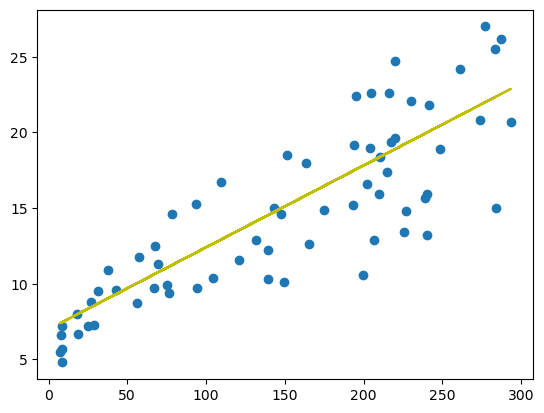

In [76]:
plt.scatter(x_test,y_test)
plt.plot(x_test,6.995+0.0541*x_test,'y')
plt.show()

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

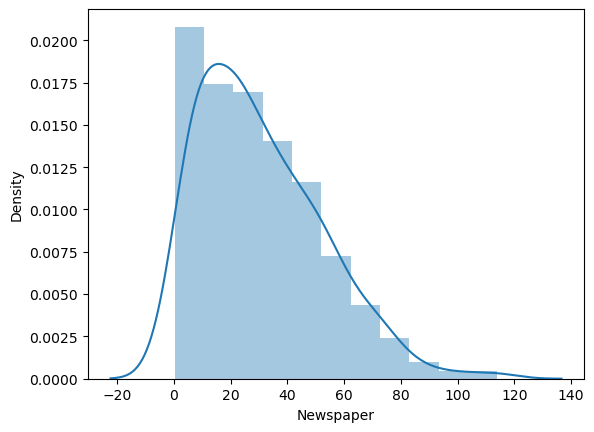

In [80]:
sns.distplot(df['Newspaper'])

In [81]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

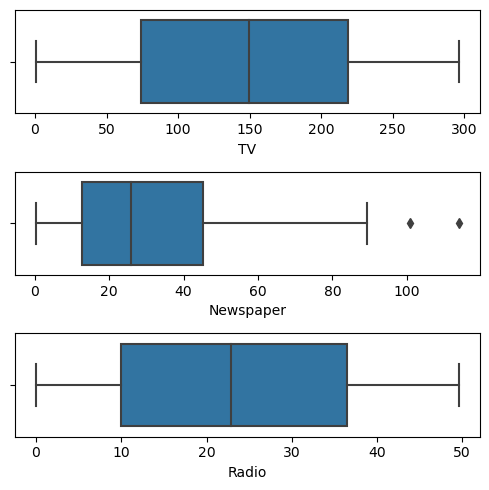

In [82]:
fig,axs=plt.subplots(3,figsize=(5,5))
plt1=sns.boxplot(df['TV'],ax=axs[0])
plt2=sns.boxplot(df['Newspaper'],ax=axs[1])
plt3=sns.boxplot(df['Radio'],ax=axs[2])
plt.tight_layout()

In [83]:
lower_bridge = df["Newspaper"].quantile(0.25) - (iqr*1.5)
upper_bridge = df["Newspaper"].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [85]:
lower_bridge = df["Newspaper"].quantile(0.25) - (iqr*1.5)
upper_bridge = df["Newspaper"].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [86]:
data=df.copy()

In [87]:
data.loc[data['Newspaper']>=93,'Newspaper']=93

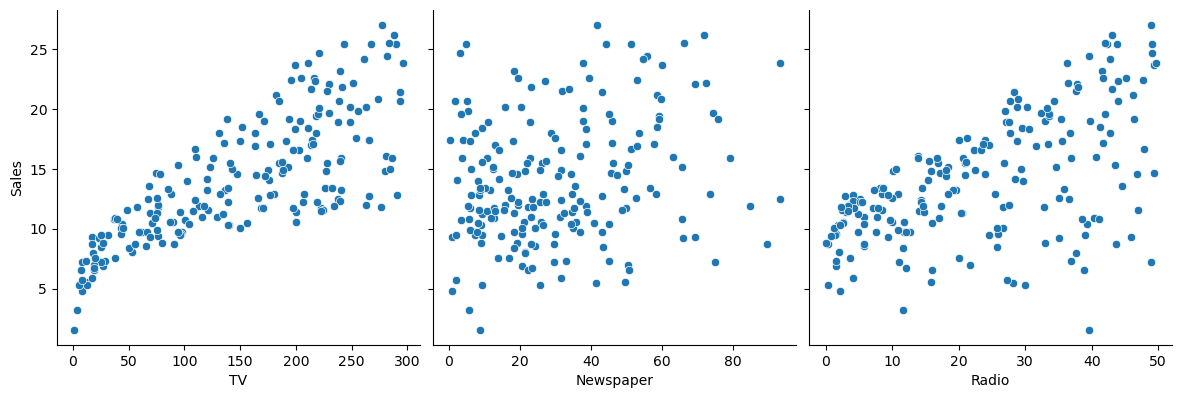

In [88]:
sns.pairplot(data,x_vars=['TV','Newspaper','Radio'],
            y_vars='Sales',height=4,aspect=1,kind='scatter')
plt.show()

<AxesSubplot:xlabel='Sales'>

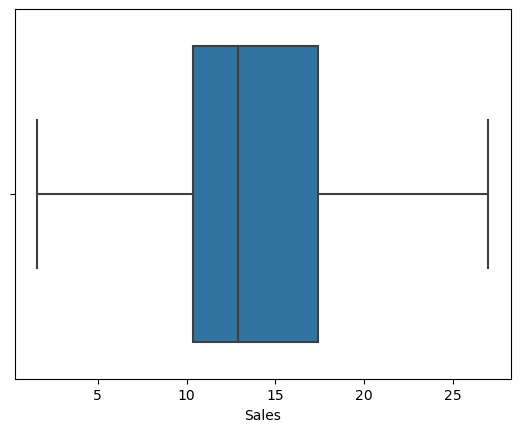

In [89]:
sns.boxplot(data['Sales'])

<AxesSubplot:xlabel='Newspaper'>

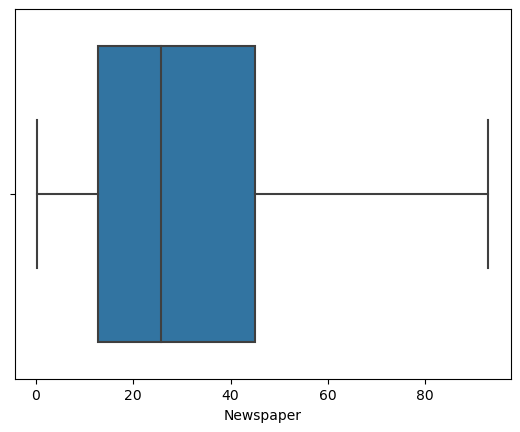

In [90]:
sns.boxplot(data['Newspaper'])

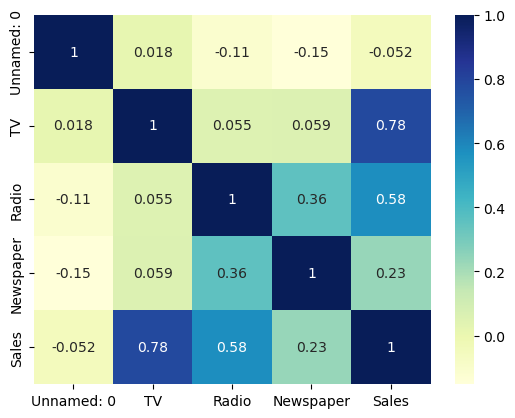

In [91]:
sns.heatmap(data.corr(),cmap="YlGnBu",annot=True)
plt.show()

In [92]:
important_features=list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [93]:
print(important_features)

['TV', 'Radio', 'Sales']


In [94]:
x=data['TV']
y=data['Sales']

In [95]:
print(x)
print(y)

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64
0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64


In [96]:
x=x.values.reshape(-1,1)

In [97]:
print(x)

[[230.1]
 [ 44.5]
 [ 17.2]
 [151.5]
 [180.8]
 [  8.7]
 [ 57.5]
 [120.2]
 [  8.6]
 [199.8]
 [ 66.1]
 [214.7]
 [ 23.8]
 [ 97.5]
 [204.1]
 [195.4]
 [ 67.8]
 [281.4]
 [ 69.2]
 [147.3]
 [218.4]
 [237.4]
 [ 13.2]
 [228.3]
 [ 62.3]
 [262.9]
 [142.9]
 [240.1]
 [248.8]
 [ 70.6]
 [292.9]
 [112.9]
 [ 97.2]
 [265.6]
 [ 95.7]
 [290.7]
 [266.9]
 [ 74.7]
 [ 43.1]
 [228. ]
 [202.5]
 [177. ]
 [293.6]
 [206.9]
 [ 25.1]
 [175.1]
 [ 89.7]
 [239.9]
 [227.2]
 [ 66.9]
 [199.8]
 [100.4]
 [216.4]
 [182.6]
 [262.7]
 [198.9]
 [  7.3]
 [136.2]
 [210.8]
 [210.7]
 [ 53.5]
 [261.3]
 [239.3]
 [102.7]
 [131.1]
 [ 69. ]
 [ 31.5]
 [139.3]
 [237.4]
 [216.8]
 [199.1]
 [109.8]
 [ 26.8]
 [129.4]
 [213.4]
 [ 16.9]
 [ 27.5]
 [120.5]
 [  5.4]
 [116. ]
 [ 76.4]
 [239.8]
 [ 75.3]
 [ 68.4]
 [213.5]
 [193.2]
 [ 76.3]
 [110.7]
 [ 88.3]
 [109.8]
 [134.3]
 [ 28.6]
 [217.7]
 [250.9]
 [107.4]
 [163.3]
 [197.6]
 [184.9]
 [289.7]
 [135.2]
 [222.4]
 [296.4]
 [280.2]
 [187.9]
 [238.2]
 [137.9]
 [ 25. ]
 [ 90.4]
 [ 13.1]
 [255.4]
 [225.8]
 

In [98]:
print(x.shape,y.shape)

(200, 1) (200,)


In [55]:
import statsmodels.api as sm

In [56]:
x_train_constant=sm.add_constant(x_train)

In [57]:
x_train_constant=sm.add_constant(x_train)

In [58]:
model=sm.OLS(y_train,x_train_constant).fit()

In [59]:
model.params

const    7.304503
x1       0.044165
dtype: float64

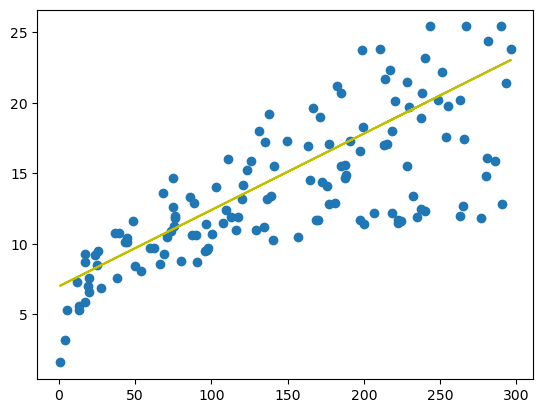

In [62]:
plt.scatter(x_train,y_train)
plt.plot(x_train,6.995+0.0541*x_train,'y')

In [65]:
y_train_pred=model.predict(x_train_constant)
res=(y_train - y_train_pred)
res

168    0.282410
142    3.057170
94    -0.547797
97     0.029435
103   -0.903060
         ...   
29     0.077466
193    4.928817
93     3.814561
155   -4.285578
47     5.300373
Name: Sales, Length: 134, dtype: float64

In [60]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     169.5
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           1.95e-25
Time:                        21:33:00   Log-Likelihood:                -349.48
No. Observations:                 134   AIC:                             703.0
Df Residuals:                     132   BIC:                             708.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3045      0.573     12.757      0.0

In [68]:
x_test_constant=sm.add_constant(x_test)
y_pred=model.predict(x_test_constant)

In [69]:
y_pred

array([11.92413572,  9.20358702, 15.83713272,  7.64898776,  7.68873604,
       15.8592151 , 16.86175496,  9.84397592, 19.39239523, 19.53372243,
       16.78667488, 16.61001587, 16.31852851, 16.44218982, 17.90845957,
       11.46482231, 17.97912318, 20.00628528, 15.03775072, 18.29269291,
       14.61818557,  8.5676146 , 16.56143465, 13.12100049,  7.62690539,
       13.99546258, 11.45157288, 16.35827679, 19.8605416 ,  8.09505175,
        7.68431956, 10.67868973,  7.67548661, 18.84475231, 10.29887286,
       14.5254396 , 17.90845957, 12.15379243, 20.27127379, 13.45223613,
       13.46548556, 13.9203825 ,  8.13038356, 10.25912459,  8.40862149,
       10.36070351, 13.80997062, 17.46681206, 17.33873428,  9.78656174,
       17.01191511, 15.93429517, 13.61564571, 17.03399749, 10.75818628,
        8.69569238, 12.64843765, 19.82962627, 10.63894145, 16.91916914,
        8.98276326, 17.27690362,  8.48811804, 16.12862008, 17.87312777,
       16.24786491])

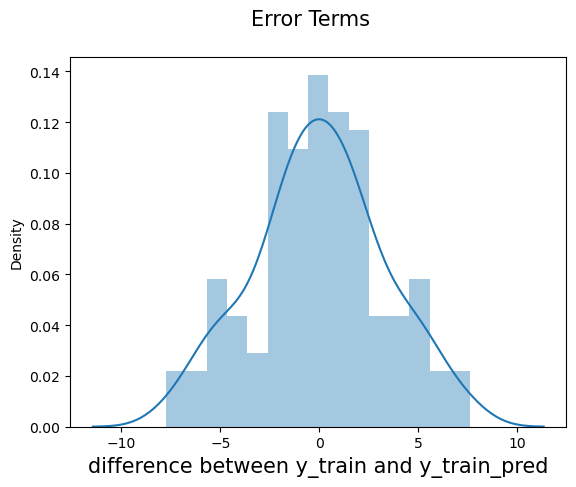

In [77]:
fig=plt.figure()
sns.distplot(res,bins=15)
fig.suptitle('Error Terms',fontsize=15)
plt.xlabel('difference between y_train and y_train_pred',fontsize=15)
plt.show()

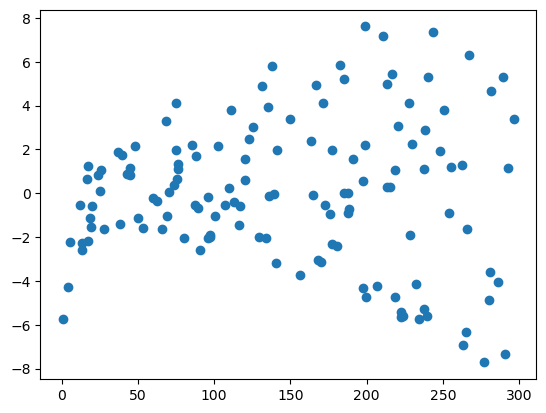

In [78]:
plt.scatter(x_train,res)
plt.show()